# Azure embeddings example

This example will cover embeddings using the Azure OpenAI service.

## Setup

First, we install the necessary dependencies and import the libraries we will be using.

In [0]:
! pip install "openai>=1.0.0,<2.0.0"
! pip install python-dotenv

     |████████████████████████████████| 454 kB 5.2 MB/s 
     |████████████████████████████████| 73 kB 936 kB/s 
     |████████████████████████████████| 345 kB 23.8 MB/s 
     |████████████████████████████████| 78 kB 9.0 MB/s 
     |████████████████████████████████| 431 kB 31.0 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 78 kB 3.0 MB/s 
     |████████████████████████████████| 58 kB 7.2 MB/s 
     |████████████████████████████████| 2.0 MB 65.6 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Not uninstalling typing-extensions at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-2f91762e-2265-43ff-8230-7b115e586e9e
    Can't uninstall 'typing-extensions'. No files were found to uninstall.
  Attempting uninstall: distro
    Found existing installation: distro 1.4.0
    Not uninstalling distro at /usr/lib/python3

In [0]:
%pip install openai
%pip install tiktoken
%pip install python-dotenv

Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
import os
import openai
import dotenv

dotenv.load_dotenv()

Out[1]: False

### Authentication

The Azure OpenAI service supports multiple authentication mechanisms that include API keys and Azure Active Directory token credentials.

In [0]:
use_azure_active_directory = False  # Set this flag to True if you are using Azure Active Directory

#### Authentication using API key

To set up the OpenAI SDK to use an *Azure API Key*, we need to set `api_key` to a key associated with your endpoint (you can find this key in *"Keys and Endpoints"* under *"Resource Management"* in the [Azure Portal](https://portal.azure.com)). You'll also find the endpoint for your resource here.

In [0]:
if not use_azure_active_directory:
    os.environ["AZURE_OPENAI_ENDPOINT"] = "https://openai-tajamar-1.openai.azure.com/"
    os.environ["AZURE_OPENAI_API_KEY"] = "4V6NPGm3iBRNFr3QJpTNBAlmSsbAXsCphvxNuLqXPWdOE1rp9KB4JQQJ99BAACYeBjFXJ3w3AAABACOG4Nul"
    endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]
    api_key = os.environ["AZURE_OPENAI_API_KEY"]
    model = "gpt-4o"
    client = openai.AzureOpenAI(
        azure_endpoint=endpoint,
        api_key=api_key,
        api_version="2023-09-01-preview"
    )

#### Authentication using Azure Active Directory
Let's now see how we can authenticate via Azure Active Directory. We'll start by installing the `azure-identity` library. This library will provide the token credentials we need to authenticate and help us build a token credential provider through the `get_bearer_token_provider` helper function. It's recommended to use `get_bearer_token_provider` over providing a static token to `AzureOpenAI` because this API will automatically cache and refresh tokens for you. 

For more information on how to set up Azure Active Directory authentication with Azure OpenAI, see the [documentation](https://learn.microsoft.com/azure/ai-services/openai/how-to/managed-identity).

In [0]:
! pip install "azure-identity>=1.15.0"

     |████████████████████████████████| 187 kB 5.3 MB/s 
     |████████████████████████████████| 113 kB 31.0 MB/s 
     |████████████████████████████████| 198 kB 90.8 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-2f91762e-2265-43ff-8230-7b115e586e9e/bin/python -m pip install --upgrade pip' command.


In [0]:
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

if use_azure_active_directory:
    endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]
    api_key = os.environ["AZURE_OPENAI_API_KEY"]

    client = openai.AzureOpenAI(
        azure_endpoint=endpoint,
        azure_ad_token_provider=get_bearer_token_provider(DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"),
        api_version="2023-09-01-preview"
    )

> Note: the AzureOpenAI infers the following arguments from their corresponding environment variables if they are not provided:

- `api_key` from `AZURE_OPENAI_API_KEY`
- `azure_ad_token` from `AZURE_OPENAI_AD_TOKEN`
- `api_version` from `OPENAI_API_VERSION`
- `azure_endpoint` from `AZURE_OPENAI_ENDPOINT`


## Deployments

In this section we are going to create a deployment of a model that we can use to create embeddings.

### Deployments: Create in the Azure OpenAI Studio
Let's deploy a model to use with embeddings. Go to https://portal.azure.com, find your Azure OpenAI resource, and then navigate to the Azure OpenAI Studio. Click on the "Deployments" tab and then create a deployment for the model you want to use for embeddings. The deployment name that you give the model will be used in the code below.

In [0]:
deployment = "text-embedding-ada-002" # Fill in the deployment name from the portal here

## Embeddings

Now let's create embeddings using the client we built.

In [0]:
embeddings = client.embeddings.create(
    model=deployment,
    input="The food was delicious and the waiter..."
)
                                
print(embeddings)

CreateEmbeddingResponse(data=[Embedding(embedding=[0.0023481971584260464, -0.00928489863872528, 0.015701189637184143, -0.007710971869528294, -0.0047217803075909615, 0.014863453805446625, -0.009849735535681248, -0.038281962275505066, -0.006930354982614517, -0.028660697862505913, 0.025182828307151794, 0.018112851306796074, -0.0036047999747097492, -0.025576310232281685, 0.000499785237479955, -0.01636122167110443, 0.02827990986406803, 0.005350081715732813, 0.009652994573116302, -0.0163866076618433, -0.015396557748317719, 0.004258487373590469, 0.007006512489169836, -0.007241332437843084, -0.0038491394370794296, 0.018506333231925964, 0.00870736874639988, -0.02268231473863125, 0.011474433355033398, 0.023926224559545517, 0.015625031664967537, -0.0034905634820461273, -0.03493101894855499, -0.004160116892307997, -0.026147492229938507, -0.021539948880672455, -0.005632500164210796, 0.011785411275923252, 0.008453509770333767, 0.004122037906199694, 0.01920444518327713, -0.014444585889577866, 0.00897

# Ejercicio 1: Generar múltiples embeddings y calcular similitud entre frases
## Objetivo: Aprender a generar embeddings para múltiples textos y calcular similitudes entre ellos.


In [0]:
# Lista de textos a procesar
texts = [
    "The weather is sunny and warm.",
    "It's a cold and rainy day.",
    "I love spending time at the beach.",
    "Reading books indoors on a rainy day is relaxing."
]

# Crear embeddings para cada texto
embeddings_list = []
for text in texts:
    response = client.embeddings.create(
    model=deployment,
    input=text)
    embeddings_list.append(response.data[0].embedding) #FIXME

# Calcular la similitud coseno entre embeddings
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_matrix = cosine_similarity(np.array(embeddings_list))

# Mostrar la matriz de similitud
print("Matriz de similitud:")
print(similarity_matrix)

Matriz de similitud:
[[1.         0.86871754 0.81671393 0.80782677]
 [0.86871754 1.         0.7727784  0.86608481]
 [0.81671393 0.7727784  1.         0.80021672]
 [0.80782677 0.86608481 0.80021672 1.        ]]


# Ejercicio 2: Reducción de dimensionalidad y visualización de embeddings
## Objetivo: Visualizar la relación entre embeddings utilizando reducción de dimensionalidad (TSNE o PCA).


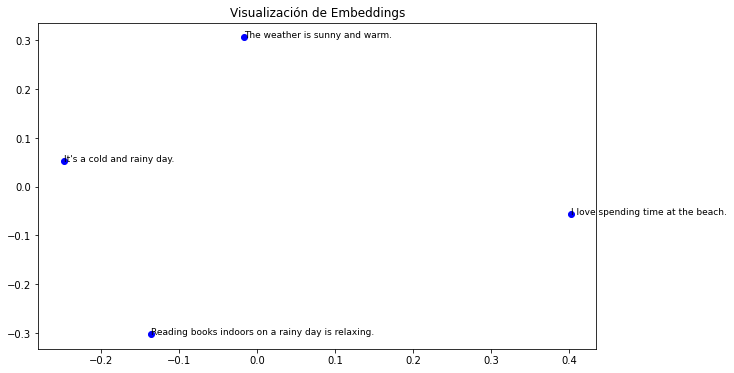

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_list)

# Graficar los embeddings
plt.figure(figsize=(10, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue')
for i, text in enumerate(texts):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], text, fontsize=9)
plt.title("Visualización de Embeddings")
plt.show()

# Ejercicio 3: Detección de temas con clustering de embeddings
## Objetivo: Agrupar textos con embeddings similares utilizando k-means.

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(embeddings_list)
labels = kmeans.labels_

# Mostrar resultados de clustering
for i, text in enumerate(texts):
    print(f"Texto: {text} - Cluster: {labels[i]}")

Texto: The weather is sunny and warm. - Cluster: 1
Texto: It's a cold and rainy day. - Cluster: 1
Texto: I love spending time at the beach. - Cluster: 0
Texto: Reading books indoors on a rainy day is relaxing. - Cluster: 1


# Ejercicio 4: Construcción de un motor de búsqueda simple con embeddings
## Objetivo: Implementar un motor de búsqueda que retorne el texto más similar a una consulta usando embeddings.


In [0]:
query = "I enjoy sunny days at the beach."
response = client.embeddings.create(
    model=deployment,
    input=query
    )

query_embedding = response.data[0].embedding

# Calcular similitud entre la consulta y la lista de textos anteriores
similarities = cosine_similarity([query_embedding], embeddings_list)[0]
most_similar_index = np.argmax(similarities)

print("Consulta:", query)
print("Texto más similar:", texts[most_similar_index])

Consulta: I enjoy sunny days at the beach.
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-1414879969196050>", line 14, in <module>
    print("Texto más similar:", texts[most_similar_index])
IndexError: list index out of range

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 1997, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1112, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/ultratb.py", line 1006, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/databricks/python/lib/python3.9/site-packa